<a href="https://colab.research.google.com/github/technisekai/orbit-future-academy-km/blob/main/Week_4_Quiz_1_Widi_Afandi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Project Overview**

## 1.1 Dataset Description

This dataset contains harvest production from 1997 to 2015 based on various states and districts. In this dataset there are several columns including


*   **State_Name**
*   **District_Name**
*   **Crop_Year**
*   **Season**
*   **Crop**
*   **Area**
*   **Production**



## 1.2 Goals


*   Get insight from dataset
*   Visualizing the insight

# **2. Dataset Overview**

In [13]:
# load library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [6]:
# define color for categorical
spring_pastels = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

## 2.1 Dataset Overview

In [7]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/orbit_kampus_merdeka/apy.csv')
# show
df.sample(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
138048,Manipur,CHANDEL,2002,Whole Year,Sweet potato,105.0,720
24378,Assam,NALBARI,1998,Kharif,Mesta,180.0,700
58547,Gujarat,BHARUCH,1998,Kharif,Arhar/Tur,92800.0,58600
96509,Karnataka,TUMKUR,2011,Kharif,Other Kharif pulses,7385.0,6546
133692,Maharashtra,PARBHANI,2002,Kharif,Maize,1300.0,900
157237,Odisha,NAYAGARH,1999,Rabi,Rapeseed &Mustard,3170.0,1340
159526,Odisha,SONEPUR,2000,Kharif,Sesamum,240.0,15.4
140618,Meghalaya,SOUTH GARO HILLS,1999,Whole Year,Sweet potato,117.0,387
54695,Chhattisgarh,RAIPUR,2001,Rabi,Other Rabi pulses,302.0,103
129279,Maharashtra,GONDIA,2012,Summer,Maize,100.0,100


In [8]:
# information of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


In [9]:
# check if in columns any nan value
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

## 2.2 Exploratory Data Analysis

In [10]:
# remove '=' in Production field
df.loc[(df['Production'] == '='), 'Production'] = np.NaN
# drop nan value
df.dropna(inplace = True)
# change type column to float
df['Production'] = df['Production'].astype('float')
# show data
df.sample(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
34009,Bihar,KATIHAR,2005,Kharif,Horse-gram,437.0,389.0
166574,Rajasthan,BHARATPUR,2003,Kharif,Cotton(lint),860.0,1776.0
148010,Odisha,BALESHWAR,2004,Rabi,Castor seed,86.0,40.0
146782,Nagaland,ZUNHEBOTO,2013,Rabi,Rajmash Kholar,430.0,530.0
224065,Uttar Pradesh,MUZAFFARNAGAR,2002,Summer,Moong(Green Gram),137.0,79.0
228496,Uttar Pradesh,SHRAVASTI,2008,Kharif,Guar seed,25.0,21.0
55820,Chhattisgarh,RAJNANDGAON,2014,Rabi,Peas & beans (Pulses),360.0,116.0
189136,Tamil Nadu,TIRUVANNAMALAI,2010,Kharif,Horse-gram,2233.0,1270.0
43944,Bihar,SITAMARHI,2004,Kharif,Urad,36.0,25.0
52739,Chhattisgarh,KOREA,2002,Rabi,Wheat,4017.0,2889.0


In [11]:
# show dataset in statistic
df.describe()

,Crop_Year,Area,Production
count,242364.000000,2.423640e+05,2.423640e+05
mean,2005.625770,1.216727e+04,5.824962e+05
std,4.958254,5.085714e+04,1.706571e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.022250e+03
max,2015.000000,8.580100e+06,1.250800e+09


## 2.3 Hypothesis Testing


*   H0 : area affects the amount of production
*   H1 : area not affects the amount of production



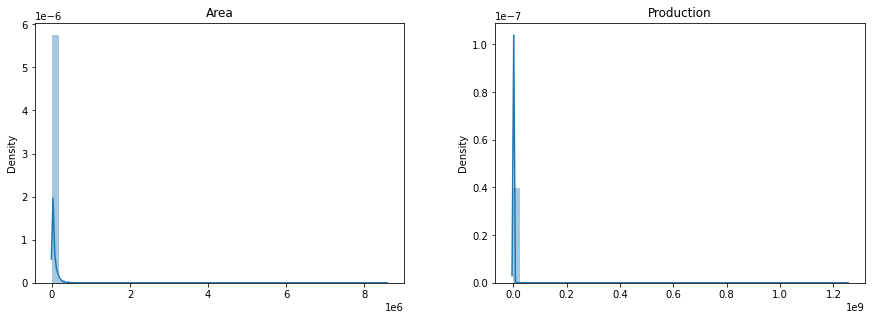

In [18]:
# graph setting
fig, axes = plt.subplots(ncols=2, nrows=1) # make graph in 2 rows 3 columns
fig.tight_layout()
plt.subplots_adjust(right=2, top=1) # size of subplot
# var for test
area = df['Area'].values
production = df['Production'].values
# visualization
sns.distplot(area, ax=axes[0]).set(title='Area') # area
sns.distplot(production, ax=axes[1]).set(title='Production') # production
plt.show()

In [ ]:
# make dict to save value
z_score = {
    'area': None,
    'production': None
}
# ktest
z_score['area'] = stats.kstest(stats.zscore(area), 'norm') # macet
z_score['production'] = stats.kstest(stats.zscore(production), 'norm') # tidakmacet
# show result
z_score

{'area': KstestResult(statistic=0.4054587561343234, pvalue=0.0),
 'production': KstestResult(statistic=0.4863856955457543, pvalue=0.0)}

The result of the area and production visualization and also p value above showing that the area and production are **not normal distribution**.

In [ ]:
stats.kruskal(area, production)

KruskalResult(statistic=511.9288741335278, pvalue=2.412950548002764e-113)

Based on **Kruskal-Wallis** test, area has no affects to the amount of production thats mean **H1 is accepted**

# **3. Insight Analysis**

## 3.1 Find Highest Production in The State

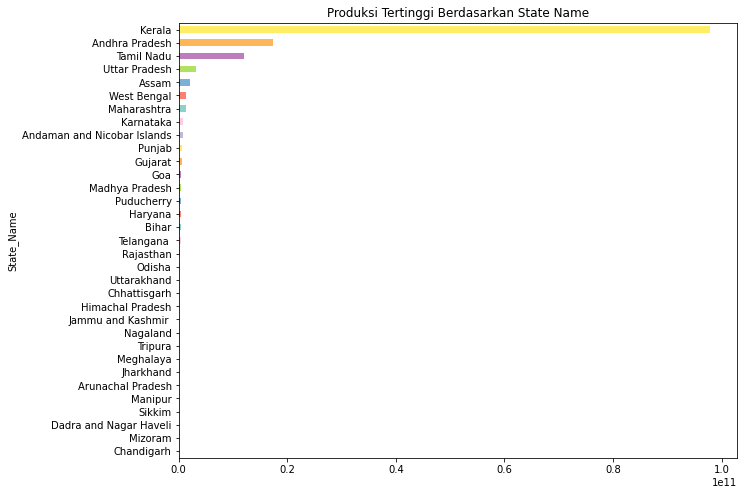

In [ ]:
# configure size graph
plt.rcParams["figure.figsize"] = (10,8)
# group by state_name
by_state_name = df.groupby(['State_Name']).sum()
# visualization by highest
by_state_name['Production'].sort_values(ascending=True).plot(kind='barh', title='Produksi Tertinggi Berdasarkan State Name', color=spring_pastels)
plt.show()

## 3.2 Find Widest Area in The State

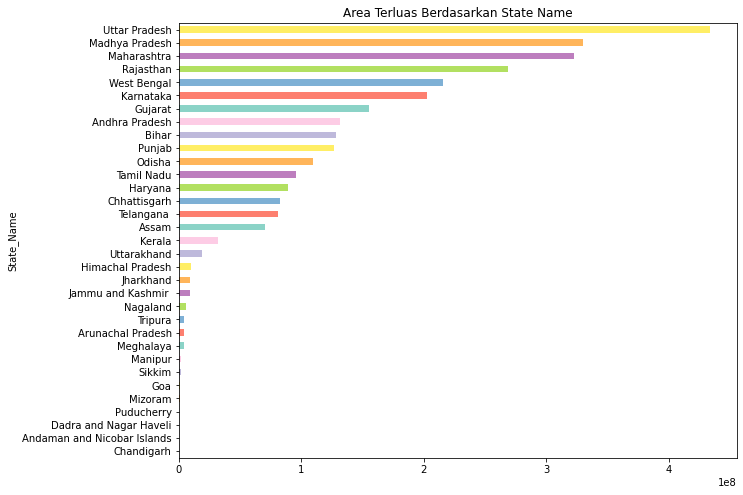

In [ ]:
# visualization by widest area
by_state_name['Area'].sort_values(ascending=True).plot(kind='barh', title='Area Terluas Berdasarkan State Name', color=spring_pastels)
plt.show()

## 3.3 The Amount of Production Based on Year

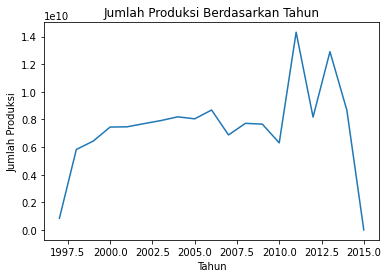

In [19]:
# group by crop year and sum
by_crop_year = df.groupby(['Crop_Year']).sum()
# visualization
by_crop_year['Production'].plot(title='Jumlah Produksi Berdasarkan Tahun',
                                xlabel='Tahun',
                                ylabel='Jumlah Produksi')
plt.show()

## 3.3 Find Crop Production

In [20]:
# configure size graph
plt.rcParams["figure.figsize"] = (8,6)
# function to visualization
def state_crop(state_name):
  # select crop and production columns if state name kerala
  by_state_crop = df[['Crop', 'Production']].loc[df['State_Name'] == state_name]
  # make percentage based on production
  by_state_crop['percent'] = ((by_state_crop['Production'] / by_state_crop['Production'].sum()) * 100)
  # change value under 5 to other
  by_state_crop.loc[by_state_crop['percent'] < 0.05, 'Crop'] = 'Other'
  # group by crop
  by_state_crop = by_state_crop.groupby('Crop').sum()
  # visualization
  by_state_crop['percent'].plot(kind='pie', 
                                  title='Jenis Tanaman dengan Produksi Tertinggi dari '+state_name,
                                  autopct='%1.0f%%', 
                                  ylabel='', 
                                  pctdistance=1.1, 
                                  labeldistance=1.2, 
                                  colors=spring_pastels)
  plt.show()

### 3.3.1 Crop Production at Kerala

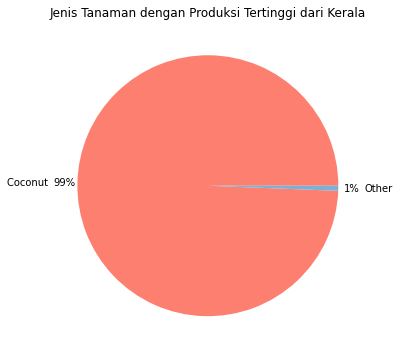

In [21]:
state_crop('Kerala')

### 3.3.2 Crop Production at Andhra Pradesh

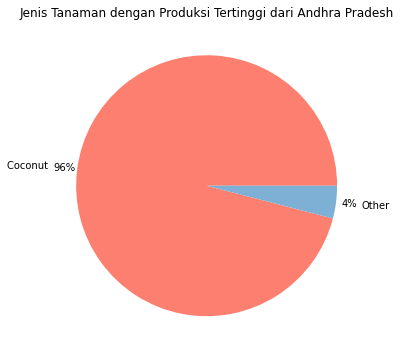

In [23]:
state_crop('Andhra Pradesh')

### 3.3.3 Crop Production at Tamil Nadu

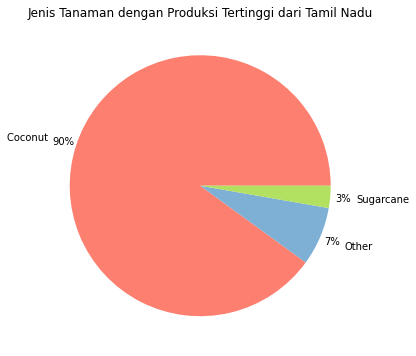

In [24]:
state_crop('Tamil Nadu')

## 3.4 Find Highest Production in The District

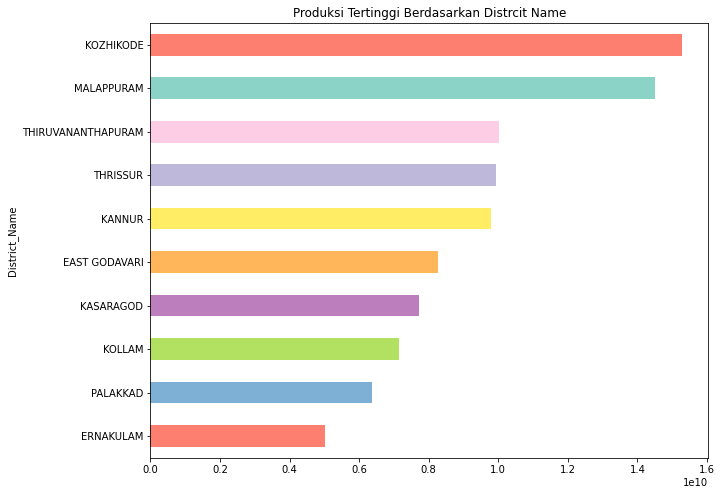

In [25]:
# configure size graph
plt.rcParams["figure.figsize"] = (10,8)
# group by state_name
by_district_name = df.groupby(['District_Name']).sum()
# visualization by highest
by_district_name['Production'].sort_values(ascending=True)[-10:].plot(kind='barh', 
                                                                      title='Produksi Tertinggi Berdasarkan Distrcit Name', 
                                                                      color=spring_pastels)
plt.show()

## 3.5 Find Widest Area in The District

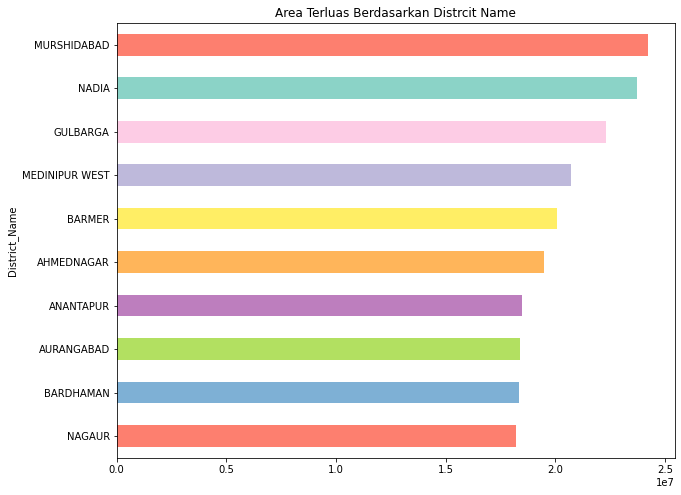

In [ ]:
# visualization by highest
by_district_name['Area'].sort_values(ascending=True)[-10:].plot(kind='barh', 
                                                                      title='Area Terluas Berdasarkan Distrcit Name', 
                                                                      color=spring_pastels)
plt.show()

## 3.6 Find Highest Crop Production

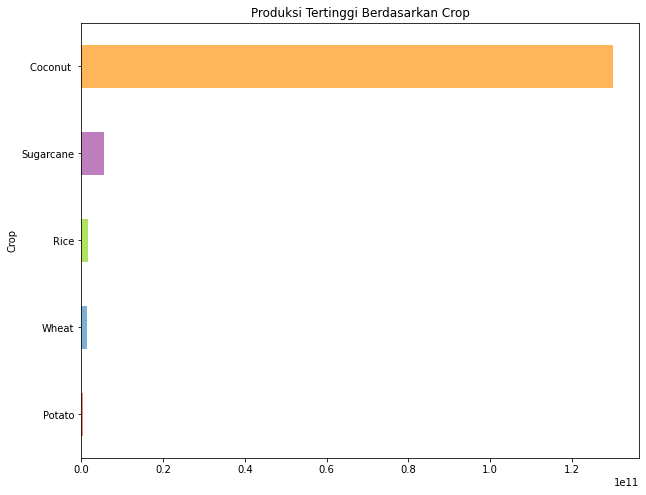

In [26]:
# configure size graph
plt.rcParams["figure.figsize"] = (10,8)
# group by state_name
by_crop = df.groupby(['Crop']).sum()
# visualization by highest
by_crop['Production'].sort_values(ascending=True)[-5:].plot(kind='barh',
                                                            title='Produksi Tertinggi Berdasarkan Tanaman(Crop)', 
                                                            color=spring_pastels)
plt.show()

## 3.7 Find Highest Crop in Season

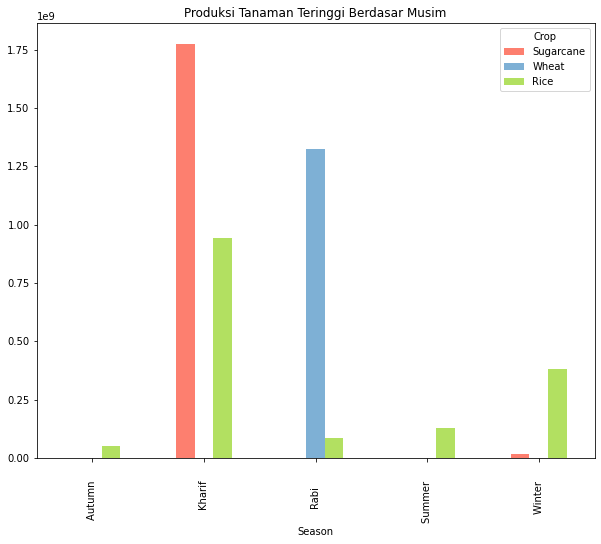

In [151]:
# select all season except whole year
by_season = df.loc[df['Season'] != 'Whole Year ']
# group by season and crop
by_season = by_season.groupby(['Season', 'Crop'])['Production'].sum().unstack()
# select column which have max value
col_max = set(by_season.idxmax(axis=1))
# visualization
by_season[col_max].plot(kind='bar',
                        title='Produksi Tanaman Teringgi Berdasar Musim',
                        color=spring_pastels)
plt.show()


# **4. Conclusion**

1.   **Area** is **not affected** to the amount of crop **production**
2.   **Top 3 states** which have highest production are **Kerala, Andhra Pradesh, and Tamil Nadu** with **Coconut as the highest** crop production
3.   **Top 3 districts** which have highest **production are Kozikode, Malapuram, and Thiruvananthapuram**
4.   **From 1994 to 2015 production** of corps was **stable** and little bit increase but **in 2010** production **decreased**
5.   **Top 3 crops** production are **Coconut, Sugarcane, and Rice**
6.  **Every seasons**, there's always **Rice** where in the **Kharif season was the highest Rice production**.**Sugarcane** also have highest production in **Kharif seasons** and **wheat** in **Rabi seasons**
7. Many **states and districts** have the **widest area** but not have the **highest crops production**

